# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [2]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

/home/nayeem/anaconda3/lib/python3.5/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '
/home/nayeem/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


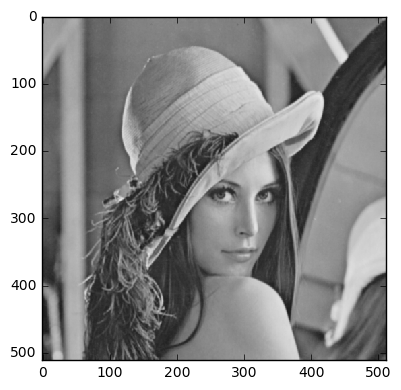

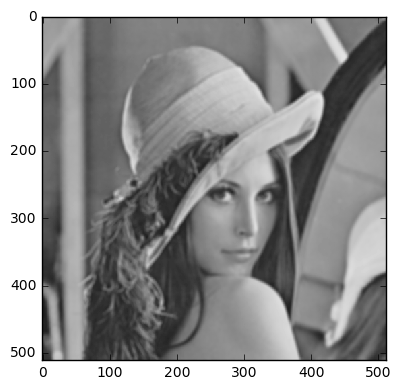

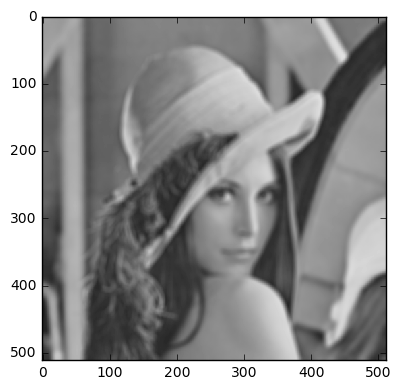

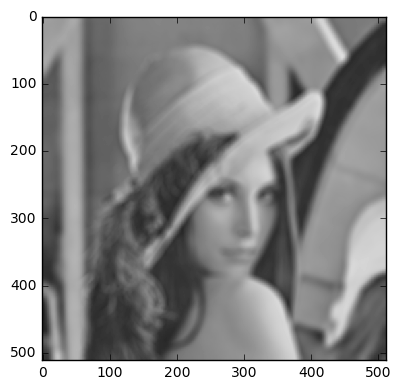

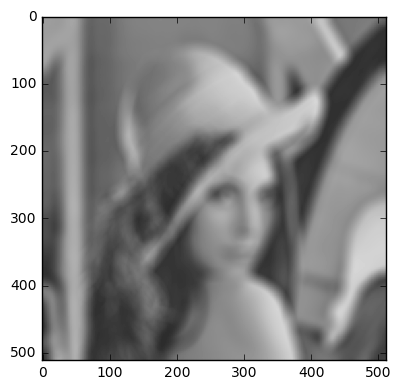

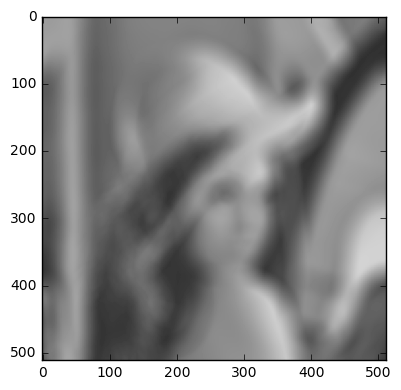

In [3]:
    from skimage.filter.rank import mean
    from skimage.morphology import disk
    
  
    
    avg = mean(lena_im, disk(1))
    io.imshow(avg)
    plt.show()
    
    avg = mean(lena_im, disk(3))
    io.imshow(avg)
    plt.show()
    
    avg = mean(lena_im, disk(5))
    io.imshow(avg)
    plt.show()
    
    avg = mean(lena_im, disk(7))
    io.imshow(avg)
    plt.show()
    
    
    avg = mean(lena_im, disk(12))
    io.imshow(avg)
    plt.show()
    
    avg = mean(lena_im, disk(20))
    io.imshow(avg)
    plt.show()



### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

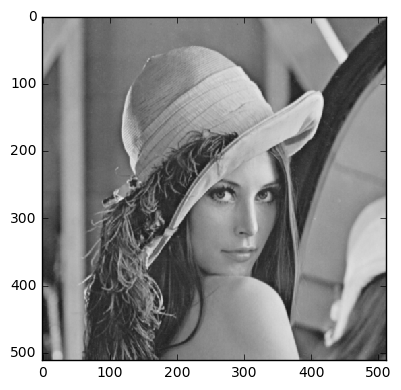

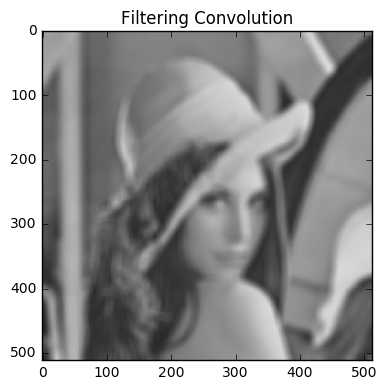

In [7]:
   
from scipy import ndimage 
 
mask = np.ones((2,2),dtype=np.float) 
mask = mask/np.sum(mask) 
avg = ndimage.convolve(lena_im,mask) 
plt.figure() 
io.imshow(avg) 
 
d = (14,14) 
mask = np.ones(d,dtype=np.float) 
mask = mask/np.sum(mask) 
avg_con = ndimage.filters.convolve(lena_im,mask) 
plt.figure() 
plt.title('Filtering Convolution')
io.imshow(avg_con) 
    

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [8]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

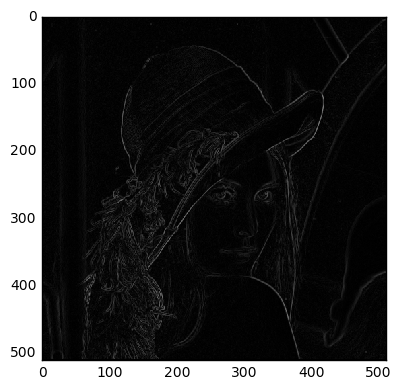

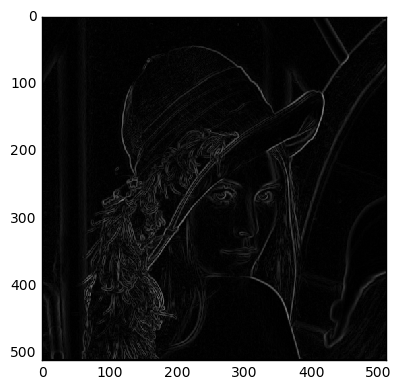

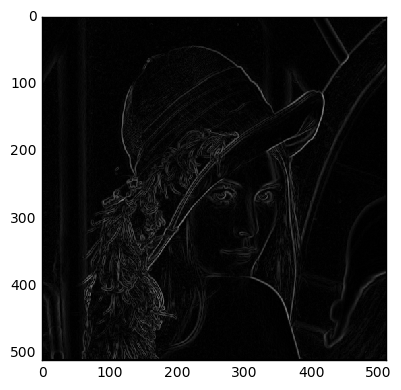

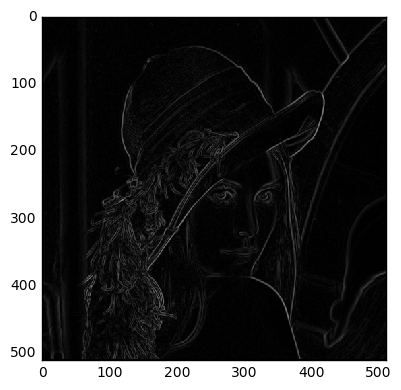

In [12]:
leaves_im = io.imread(Path.__add__('leaves.jpg'), as_grey=True) 
leaves_im = img_as_float(lena_im)
plt.show()

robert = filters.roberts(leaves_im) 
plt.figure() 
io.imshow(robert) 
 
prewitt = filters.prewitt(leaves_im) 
plt.figure() 
io.imshow(prewitt) 
 
sobel = filters.sobel(leaves_im) 
plt.figure() 
io.imshow(sobel) 
 
scharr = filters.scharr(leaves_im) 
plt.figure() 
io.imshow(scharr) 


##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

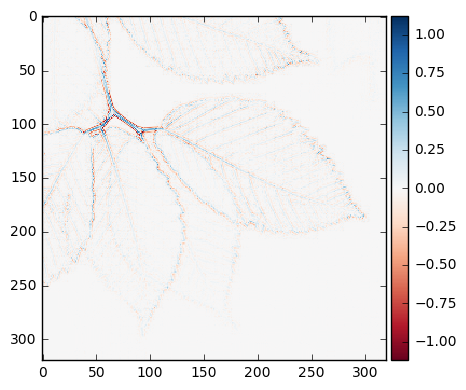

In [16]:
from skimage.color import rgb2gray 
path = './images/' 
leaves_im = io.imread(Path.__add__('leaves.jpg'),)
 
leaves_im = img_as_float(leaves_im) 
leaves_im = rgb2gray(leaves_im)
laplace = ndimage.filters.laplace(leaves_im)
plt.figure()
io.imshow(laplace)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [19]:
from skimage import util

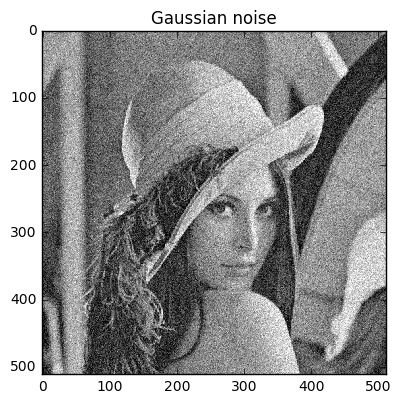

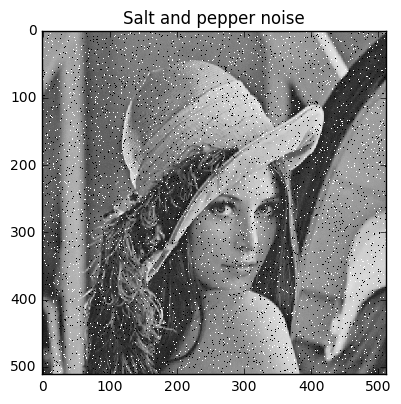

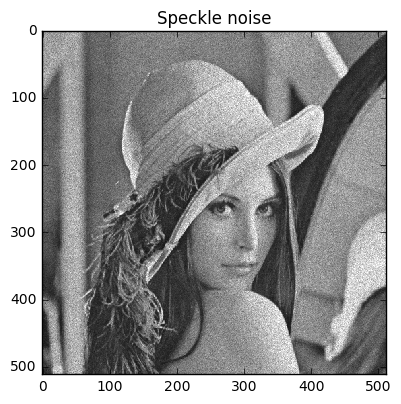

In [20]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

/home/nayeem/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


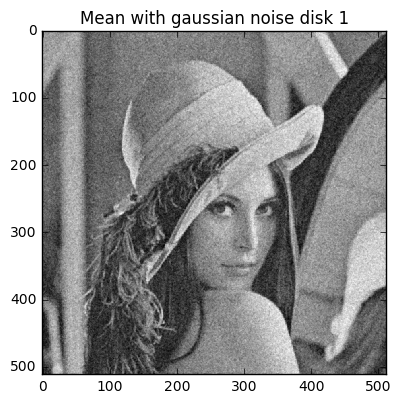

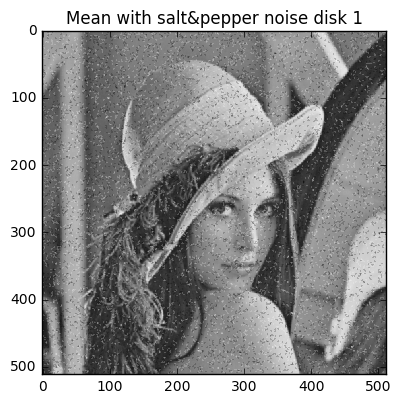

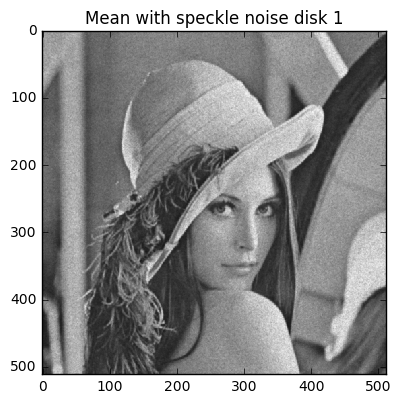

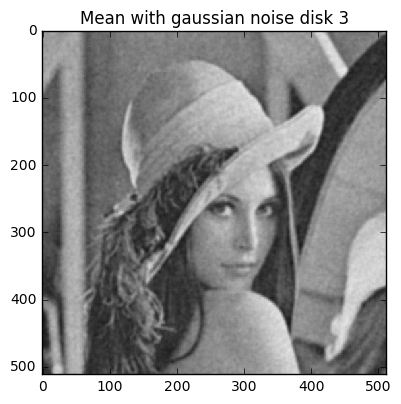

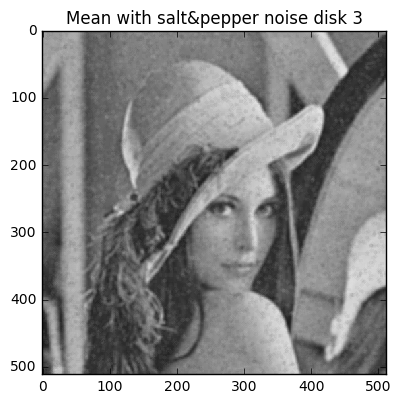

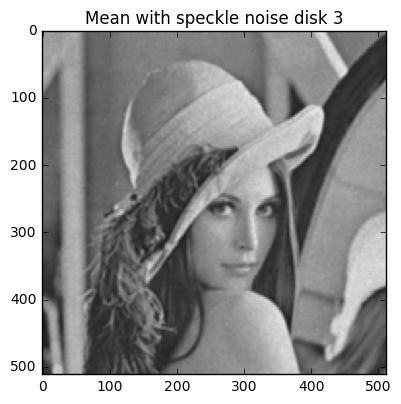

In [23]:
from skimage.morphology import disk 
from skimage.filters.rank import mean

avg = mean(lena_gaussian,disk(1)) 
plt.figure() 
io.imshow(avg) 
plt.title('Mean with gaussian noise disk 1') 
 
avg = mean(lena_sp,disk(1)) 
plt.figure() 
io.imshow(avg) 
plt.title('Mean with salt&pepper noise disk 1') 
 
avg = mean(lena_speckle,disk(1)) 
plt.figure() 
io.imshow(avg) 
plt.title('Mean with speckle noise disk 1') 
 
 
avg_1 = mean(lena_gaussian,disk(3)) 
plt.figure() 
io.imshow(avg_1) 
plt.title('Mean with gaussian noise disk 3') 
 
avg_1 = mean(lena_sp,disk(3)) 
plt.figure() 
io.imshow(avg_1) 
plt.title('Mean with salt&pepper noise disk 3') 
 
avg_1 = mean(lena_speckle,disk(3)) 
plt.figure() 
io.imshow(avg_1) 
plt.title('Mean with speckle noise disk 3') 

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

/home/nayeem/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


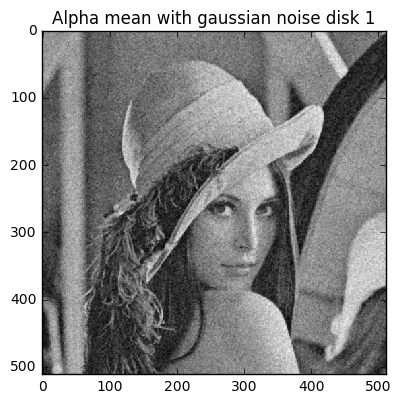

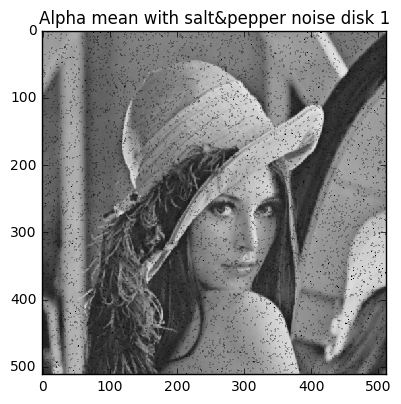

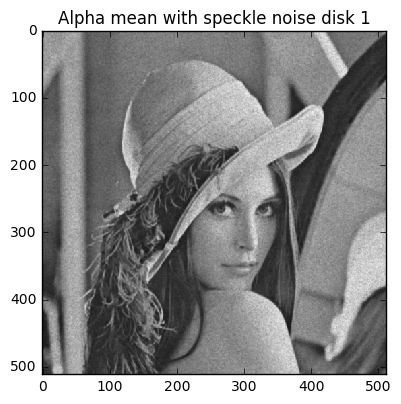

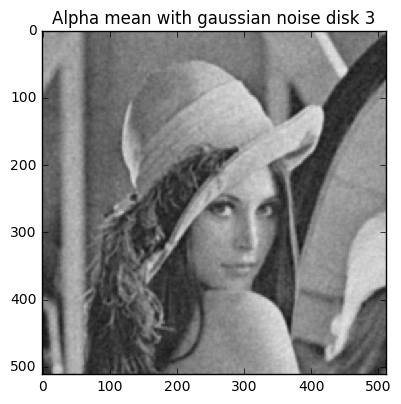

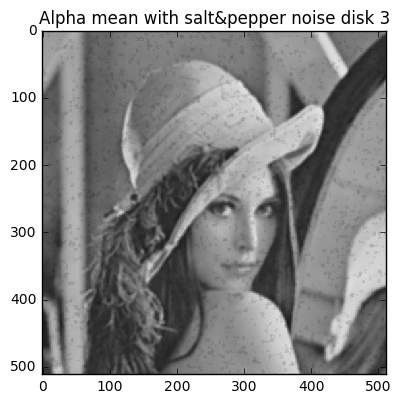

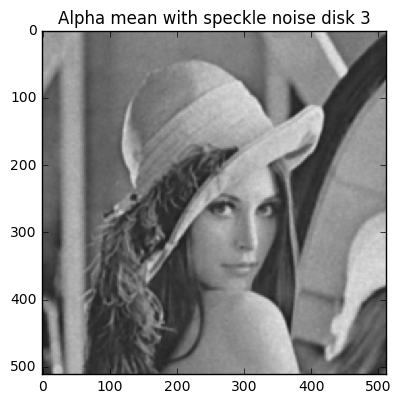

In [31]:
from skimage.filters.rank import mean_percentile 
 
avg_a = mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95) 
plt.figure() 
io.imshow(avg_a) 
plt.title('Alpha mean with gaussian noise disk 1') 
 
avg_a = mean_percentile(lena_sp,disk(1),p0=0.05,p1=0.95) 
plt.figure() 
io.imshow(avg_a) 
plt.title('Alpha mean with salt&pepper noise disk 1') 
 
avg_a = mean_percentile(lena_speckle,disk(1),p0=0.05,p1=0.95) 
plt.figure() 
io.imshow(avg_a) 
plt.title('Alpha mean with speckle noise disk 1')

avg_a1 = mean_percentile(lena_gaussian,disk(3),p0=0.05,p1=0.95) 
plt.figure() 
io.imshow(avg_a1) 
plt.title('Alpha mean with gaussian noise disk 3') 
 
avg_a1 = mean_percentile(lena_sp,disk(3),p0=0.05,p1=0.95) 
plt.figure() 
io.imshow(avg_a1) 
plt.title('Alpha mean with salt&pepper noise disk 3') 
 
avg_a1 = mean_percentile(lena_speckle,disk(3),p0=0.05,p1=0.95) 
plt.figure() 
io.imshow(avg_a1) 
plt.title('Alpha mean with speckle noise disk 3')

** median filter: **

/home/nayeem/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


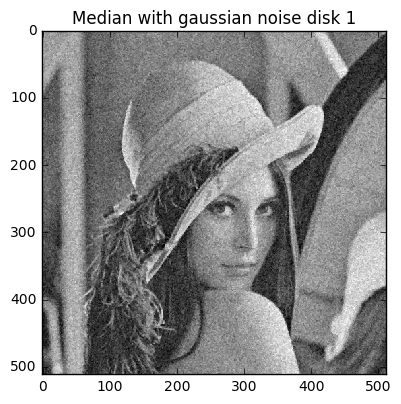

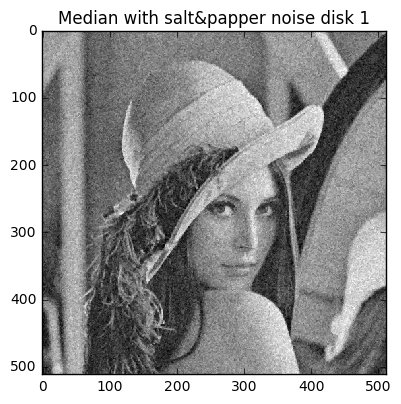

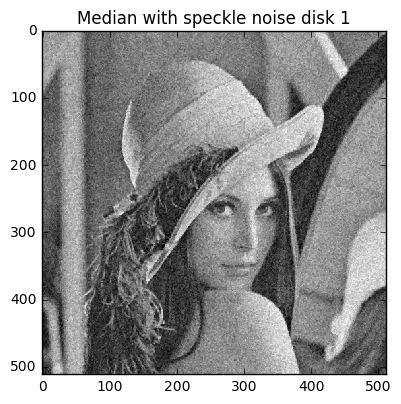

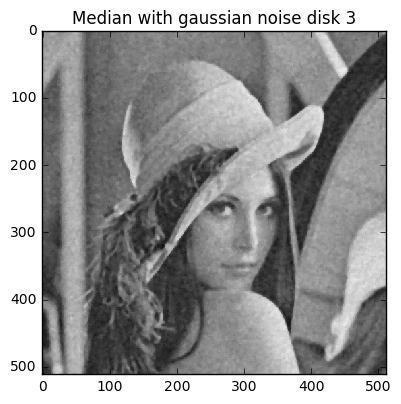

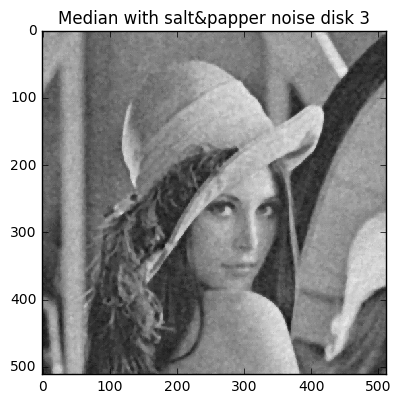

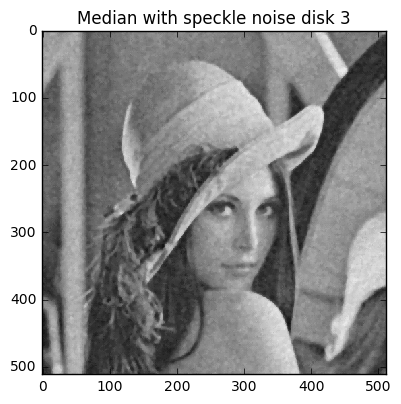

In [25]:
from skimage.morphology import disk 
from skimage.filters.rank import median

avg_m = median(lena_gaussian,disk(1)) 
plt.figure() 
io.imshow(avg_m) 
plt.title('Median with gaussian noise disk 1') 

avg_m = median(lena_gaussian,disk(1)) 
plt.figure() 
io.imshow(avg_m) 
plt.title('Median with salt&papper noise disk 1') 

avg_m = median(lena_gaussian,disk(1)) 
plt.figure() 
io.imshow(avg_m) 
plt.title('Median with speckle noise disk 1') 

avg_m1 = median(lena_gaussian,disk(3)) 
plt.figure() 
io.imshow(avg_m1) 
plt.title('Median with gaussian noise disk 3') 

avg_m1 = median(lena_gaussian,disk(3)) 
plt.figure() 
io.imshow(avg_m1) 
plt.title('Median with salt&papper noise disk 3') 

avg_m1 = median(lena_gaussian,disk(3)) 
plt.figure() 
io.imshow(avg_m1) 
plt.title('Median with speckle noise disk 3')





## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

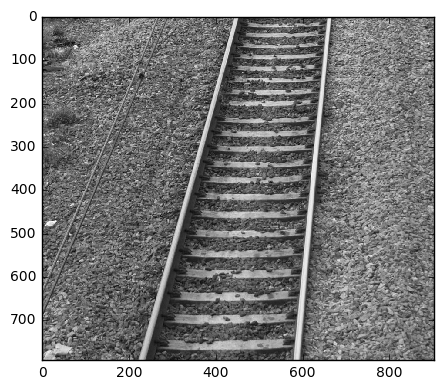

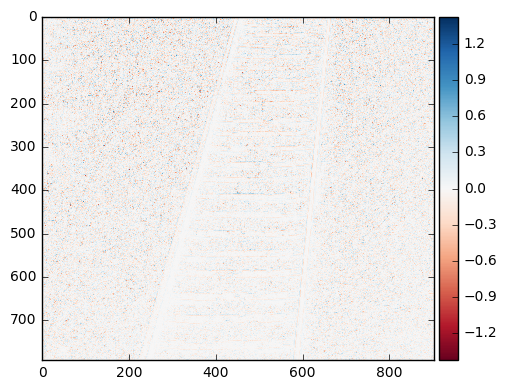

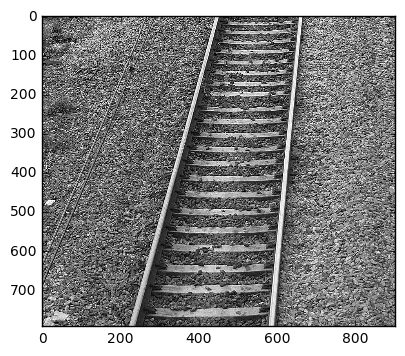

In [40]:
from scipy.ndimage import filters 
from skimage.color import rgb2gray 
Path = './images/' 
rail_im = io.imread(Path.__add__('railway.jpg')) 
rail_im = rgb2gray(rail_im) 
rail_im = img_as_float(rail_im) 
plt.figure() 
io.imshow(rail_im) 
 
laplace = ndimage.filters.laplace(rail_im) 
plt.figure() 
io.imshow(laplace) 
 
sharp_im = (rail_im-laplace) 
plt.figure() 
plt.imshow(sharp_im,cmap=cm.gray,vmin = 0, vmax=1)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

ValueError: argument must be "box", or "datalim"

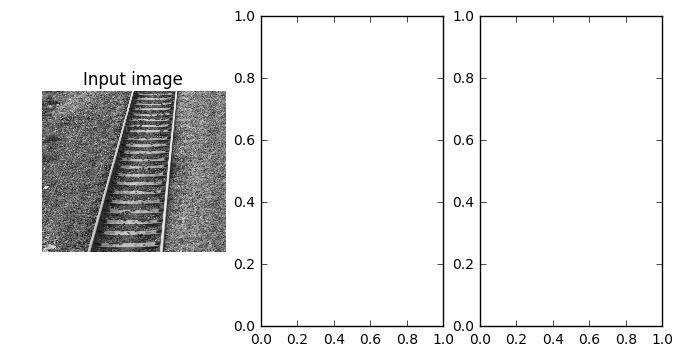

In [42]:
from skimage import transform 
from skimage import feature 
 
railway_primedge = feature.canny(rail_im) 
 
 
lines = transform.probabilistic_hough_line(railway_primedge) 
 
 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4))
 
ax1.imshow(rail_im, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
ax1.set_axis_off() 
ax1.set_adjustable('box‐forced') 
 
ax2.imshow(railway_primedge, cmap=plt.cm.gray) 
ax2.set_title('Canny edges') 
ax2.set_axis_off() 
ax2.set_adjustable('box‐forced') 
 
ax3.imshow(railway_primedge * 0) 
 
for line in lines: 
    p0, p1 = line 
    ax3.plot((p0[0], p1[0]), (p0[1], p1[1])) 
 
ax3.set_title('Probabilistic Hough') 
ax3.set_axis_off() 
ax3.set_adjustable('box‐forced') 
plt.show()

ValueError: argument must be "box", or "datalim"

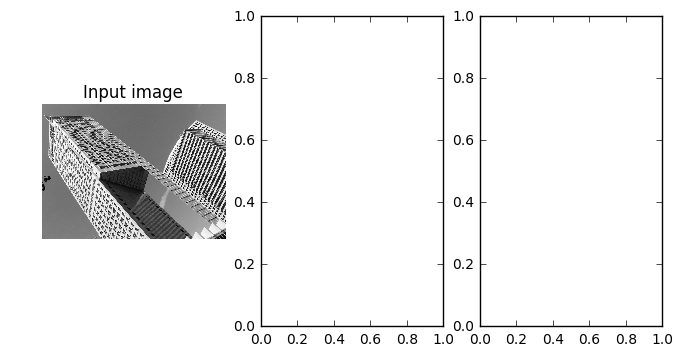

In [44]:
from skimage import transform 
from skimage import feature 
building_im = io.imread(Path.__add__('building.jpg'),as_grey=True) 
building_primedge = feature.canny(building_im) 
 
 
lines = transform.probabilistic_hough_line(building_primedge) 
 
 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,4))
 
ax1.imshow(building_im, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
ax1.set_axis_off() 
ax1.set_adjustable('box‐forced') 
 
ax2.imshow(building_primedge, cmap=plt.cm.gray) 
ax2.set_title('Canny edges') 
ax2.set_axis_off() 
ax2.set_adjustable('box‐forced') 
 
ax3.imshow(building_primedge * 0) 
 
for line in lines: 
    p0, p1 = line 
    ax3.plot((p0[0], p1[0]), (p0[1], p1[1])) 
 
ax3.set_title('Probabilistic Hough') 
ax3.set_axis_off() 